## 🧭 Notebook 1 — Exploring Hotel Demand and COVID-Era Trends (2016–2024)

### 🟩 1. Setup and Imports

In [1]:
# --- Basic setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Plot style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

# Data path
DATA_PATH = Path("../data/processed/hotel_panel.csv")

### 🟩 2. Load dataset

In [2]:
df = pd.read_csv(DATA_PATH, parse_dates=["month"])
df["year"] = df["month"].dt.year

print("✅ Dataset loaded:", df.shape)
df.head()

✅ Dataset loaded: (3328, 21)


,region,time,nights_spent,gdp,unemployment_rate,turnover_index,month,covid_cases,gdp_lag1,gdp_lag2,...,turnover_index_lag1,turnover_index_lag2,turnover_index_lag3,covid_cases_lag1,covid_cases_lag2,covid_cases_lag3,unemployment_rate_lag1,unemployment_rate_lag2,unemployment_rate_lag3,year
0,AT,2015-01-31,1833949.0,61688.900000,5.5,NaN,2015-01-31,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015
1,AT,2015-02-28,2145686.0,62111.133333,5.9,NaN,2015-02-28,0.0,61688.900000,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,5.5,NaN,NaN,2015
2,AT,2015-03-31,1934635.0,62533.366667,5.4,NaN,2015-03-31,0.0,62111.133333,61688.900000,...,NaN,NaN,NaN,0.0,0.0,NaN,5.9,5.5,NaN,2015
3,AT,2015-04-30,1468507.0,62955.600000,5.6,NaN,2015-04-30,0.0,62533.366667,62111.133333,...,NaN,NaN,NaN,0.0,0.0,0.0,5.4,5.9,5.5,2015
4,AT,2015-05-31,1792973.0,63353.033333,5.8,NaN,2015-05-31,0.0,62955.600000,62533.366667,...,NaN,NaN,NaN,0.0,0.0,0.0,5.6,5.4,5.9,2015


### 🟩 3. Quick overview

In [3]:
df.info()
display(df.describe().T.round(2))

# Missingness overview
(df.isna().mean() * 100).round(1).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3328 entries, 0 to 3327
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   region                  3328 non-null   object        
 1   time                    3328 non-null   object        
 2   nights_spent            3292 non-null   float64       
 3   gdp                     3224 non-null   float64       
 4   unemployment_rate       3328 non-null   float64       
 5   turnover_index          2630 non-null   float64       
 6   month                   3328 non-null   datetime64[ns]
 7   covid_cases             3328 non-null   float64       
 8   gdp_lag1                3224 non-null   float64       
 9   gdp_lag2                3224 non-null   float64       
 10  gdp_lag3                3224 non-null   float64       
 11  turnover_index_lag1     2626 non-null   float64       
 12  turnover_index_lag2     2604 non-null   float64 

,count,mean,min,25%,50%,75%,max,std
nights_spent,3292.0,2645412.065006,0.0,175969.5,840674.0,2193637.0,30196895.0,4765346.995994
gdp,3224.0,97690.145192,1681.0,8332.858333,36015.45,90921.45,669989.9,154379.144163
unemployment_rate,3328.0,6.672356,2.0,4.6,6.0,7.7,25.1,3.238143
turnover_index,2630.0,132.005133,6.3,95.325,126.05,165.5,419.6,53.234566
month,3328,2020-05-15 15:22:30,2015-01-31 00:00:00,2017-09-22 12:00:00,2020-05-15 12:00:00,2023-01-07 18:00:00,2025-08-31 00:00:00,NaN
covid_cases,3328.0,330.872578,0.0,0.0,0.0,84.148797,17927.075295,1184.300023
gdp_lag1,3224.0,97690.145192,1681.0,8332.858333,36015.45,90921.45,669989.9,154379.144163
gdp_lag2,3224.0,97690.145192,1681.0,8332.858333,36015.45,90921.45,669989.9,154379.144163
gdp_lag3,3224.0,97690.145192,1681.0,8332.858333,36015.45,90921.45,669989.9,154379.144163
turnover_index_lag1,2626.0,131.880312,6.3,95.3,126.0,165.4,419.6,53.167102


turnover_index_lag3       22.5
turnover_index_lag2       21.8
turnover_index_lag1       21.1
turnover_index            21.0
gdp_lag3                   3.1
gdp                        3.1
gdp_lag1                   3.1
gdp_lag2                   3.1
unemployment_rate_lag3     2.3
covid_cases_lag3           2.3
covid_cases_lag2           1.6
unemployment_rate_lag2     1.6
nights_spent               1.1
unemployment_rate_lag1     0.8
covid_cases_lag1           0.8
region                     0.0
time                       0.0
covid_cases                0.0
month                      0.0
unemployment_rate          0.0
year                       0.0
dtype: float64

### 🟩 4. Completeness by year

In [12]:
coverage = (
    df.groupby("year")[['region', 'time', 'nights_spent', 'gdp', 'unemployment_rate', 
                        'turnover_index', 'month', 'covid_cases', 'gdp_lag1', 'gdp_lag2', 'gdp_lag3', 
                        'turnover_index_lag1', 'turnover_index_lag2', 'turnover_index_lag3', 'covid_cases_lag1', 'covid_cases_lag2', 'covid_cases_lag3', 
                        'unemployment_rate_lag1', 'unemployment_rate_lag2', 'unemployment_rate_lag3', 'year', 'period', 'nights_growth_yoy']]
    .apply(lambda x: x.notna().mean().round(2))
)
coverage.tail(15)

,region,time,nights_spent,gdp,unemployment_rate,turnover_index,month,covid_cases,gdp_lag1,gdp_lag2,...,turnover_index_lag3,covid_cases_lag1,covid_cases_lag2,covid_cases_lag3,unemployment_rate_lag1,unemployment_rate_lag2,unemployment_rate_lag3,year,period,nights_growth_yoy
year,,,,,,,,,,,,,,,,,,,,,
2015,1.0,1.0,0.96,1.0,1.0,0.69,1.0,1.0,0.92,0.83,...,0.52,0.92,0.83,0.75,0.92,0.83,0.75,1.0,1.0,0.00
2016,1.0,1.0,0.96,1.0,1.0,0.69,1.0,1.0,1.00,1.00,...,0.69,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,0.96
2017,1.0,1.0,1.00,1.0,1.0,0.69,1.0,1.0,1.00,1.00,...,0.69,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,0.96
2018,1.0,1.0,1.00,1.0,1.0,0.69,1.0,1.0,1.00,1.00,...,0.69,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00
2019,1.0,1.0,0.96,1.0,1.0,0.69,1.0,1.0,1.00,1.00,...,0.69,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00
2020,1.0,1.0,1.00,1.0,1.0,0.73,1.0,1.0,1.00,1.00,...,0.72,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00
2021,1.0,1.0,1.00,1.0,1.0,0.92,1.0,1.0,1.00,1.00,...,0.88,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00
2022,1.0,1.0,1.00,1.0,1.0,0.92,1.0,1.0,1.00,1.00,...,0.92,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00
2023,1.0,1.0,1.00,1.0,1.0,0.92,1.0,1.0,1.00,1.00,...,0.92,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.00


### 🟩 5. Define pandemic phases

In [13]:
def classify_period(year):
    if year < 2020:
        return "Pre-COVID"
    elif 2020 <= year <= 2022:
        return "COVID"
    else:
        return "Post-COVID"

df["period"] = df["year"].apply(classify_period)
df["period"].value_counts()

period
Pre-COVID     1560
COVID          936
Post-COVID     832
Name: count, dtype: int64

### 🟩 6. Basic trend plots (EU-level averages)

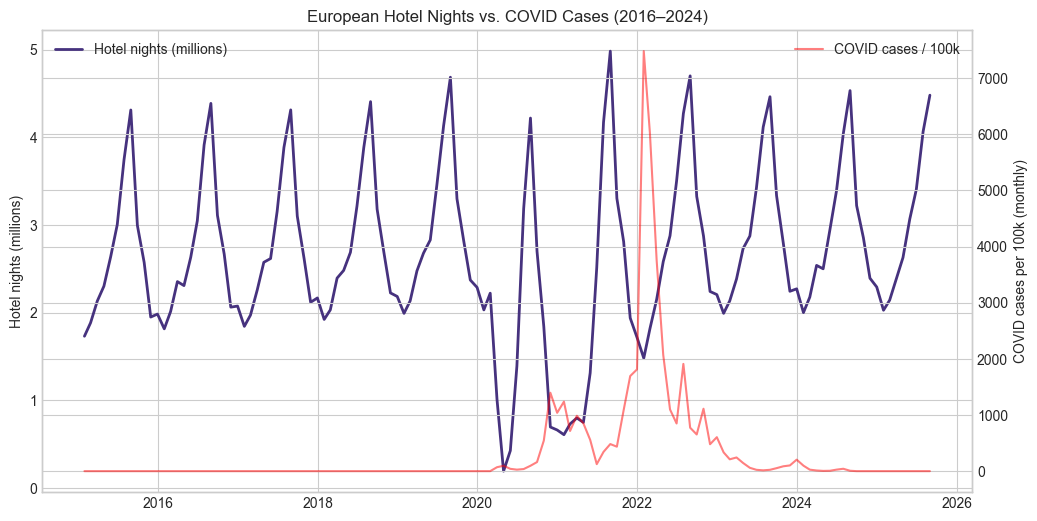

In [14]:
agg = (
    df.groupby("month")[["nights_spent", "gdp", "unemployment_rate", "covid_cases"]]
    .mean()
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(agg["month"], agg["nights_spent"]/1e6, label="Hotel nights (millions)", linewidth=2)
ax1.set_ylabel("Hotel nights (millions)")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(agg["month"], agg["covid_cases"], color="red", alpha=0.5, label="COVID cases / 100k")
ax2.set_ylabel("COVID cases per 100k (monthly)")
ax2.legend(loc="upper right")

plt.title("European Hotel Nights vs. COVID Cases (2016–2024)")
plt.show()

### 🟩 7. Country-level heatmaps (trend of recovery)

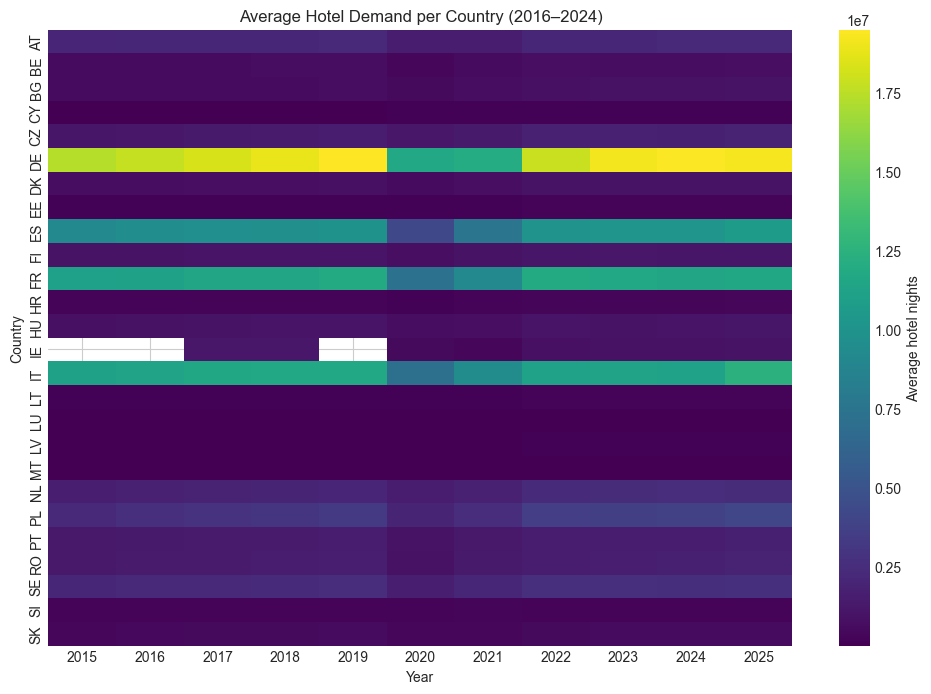

In [15]:
pivot = df.pivot_table(
    index="region", columns="year", values="nights_spent", aggfunc="mean"
)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="viridis", cbar_kws={'label': 'Average hotel nights'})
plt.title("Average Hotel Demand per Country (2016–2024)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()

### 🟩 8. Correlation analysis by period

In [16]:
corrs = (
    df.groupby("period")[["nights_spent", "gdp", "unemployment_rate", "covid_cases"]]
    .corr()
    .round(2)
)
corrs.loc["Pre-COVID"].iloc[:4, :4]

,nights_spent,gdp,unemployment_rate,covid_cases
nights_spent,1.00,0.91,0.16,NaN
gdp,0.91,1.00,0.10,NaN
unemployment_rate,0.16,0.10,1.00,NaN
covid_cases,NaN,NaN,NaN,NaN


### 🟩 9. Simple growth-rate and seasonality check

/var/folders/h3/p7wl5qls22b6g1rct6ljfgvc0000gn/T/ipykernel_57408/3832781863.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["nights_growth_yoy"] = df.groupby("region")["nights_spent"].pct_change(12)


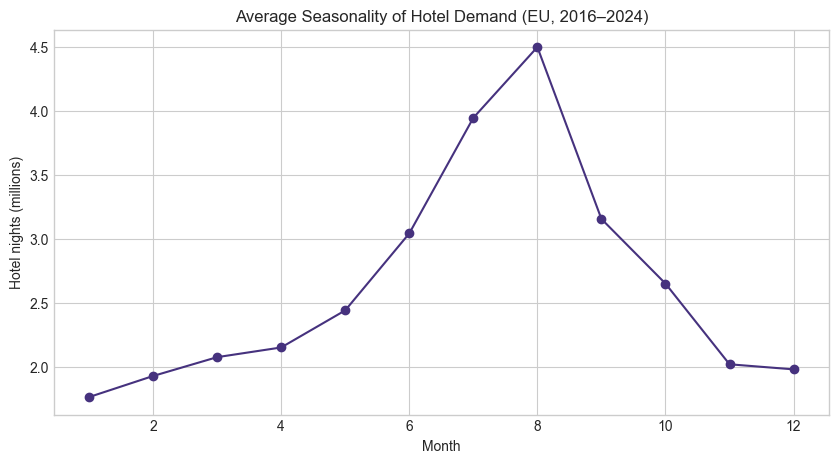

In [9]:
df["nights_growth_yoy"] = df.groupby("region")["nights_spent"].pct_change(12)
seasonality = df.groupby(df["month"].dt.month)["nights_spent"].mean()

plt.figure(figsize=(10,5))
plt.plot(seasonality.index, seasonality.values / 1e6, marker="o")
plt.title("Average Seasonality of Hotel Demand (EU, 2016–2024)")
plt.xlabel("Month")
plt.ylabel("Hotel nights (millions)")
plt.show()

### 🟩 10. Save preprocessed subsets for modeling

In [10]:
covid_df = df[df["period"] == "COVID"].copy()
full_df = df.copy()

covid_df.to_csv("../data/processed/hotel_panel_clean_covid.csv", index=False)
full_df.to_csv("../data/processed/hotel_panel_clean_full.csv", index=False)

print("💾 Saved COVID-period subset:", covid_df.shape)
print("💾 Saved full dataset:", full_df.shape)

💾 Saved COVID-period subset: (936, 23)
💾 Saved full dataset: (3328, 23)
